In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Task 1: Load Dataset & EDA

In [3]:
df = pd.read_csv("wine.csv")

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Figure size 1200x800 with 0 Axes>

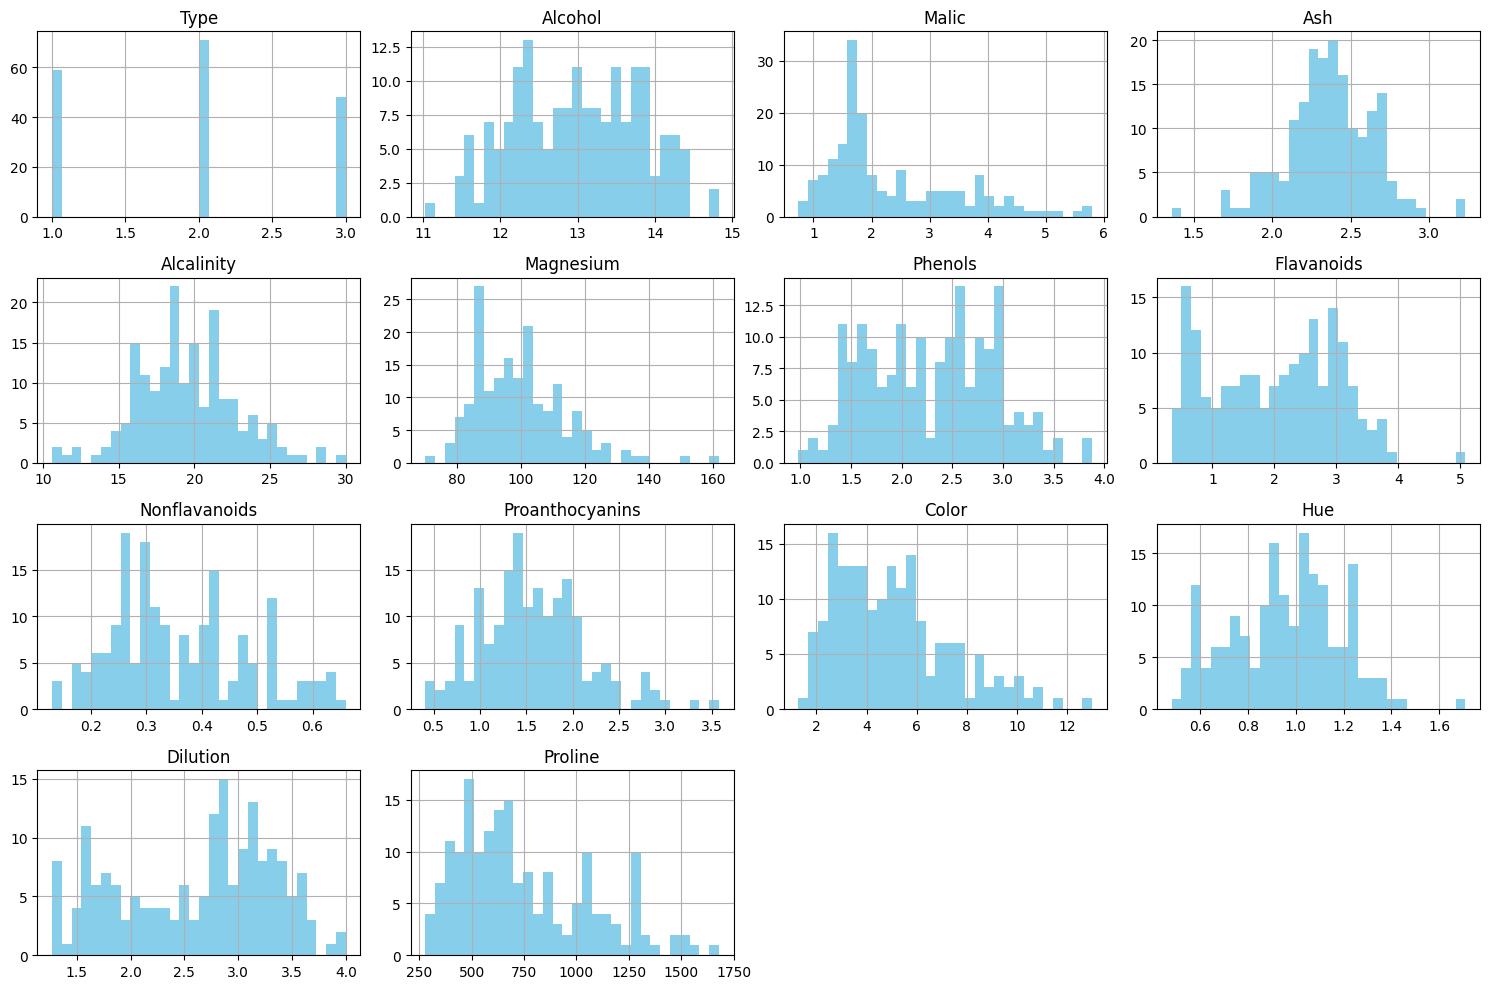

In [7]:
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()

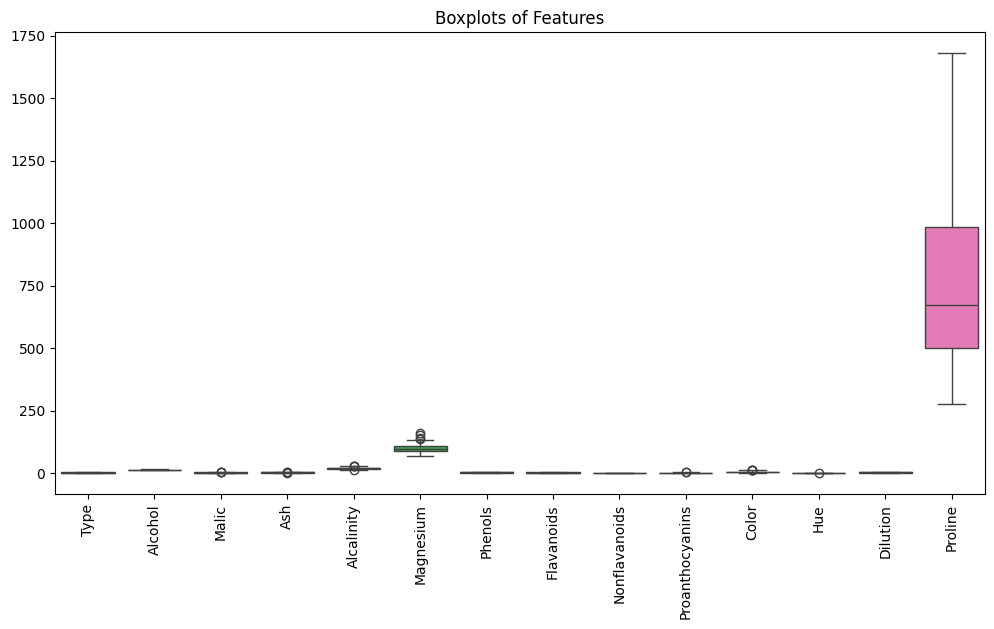

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

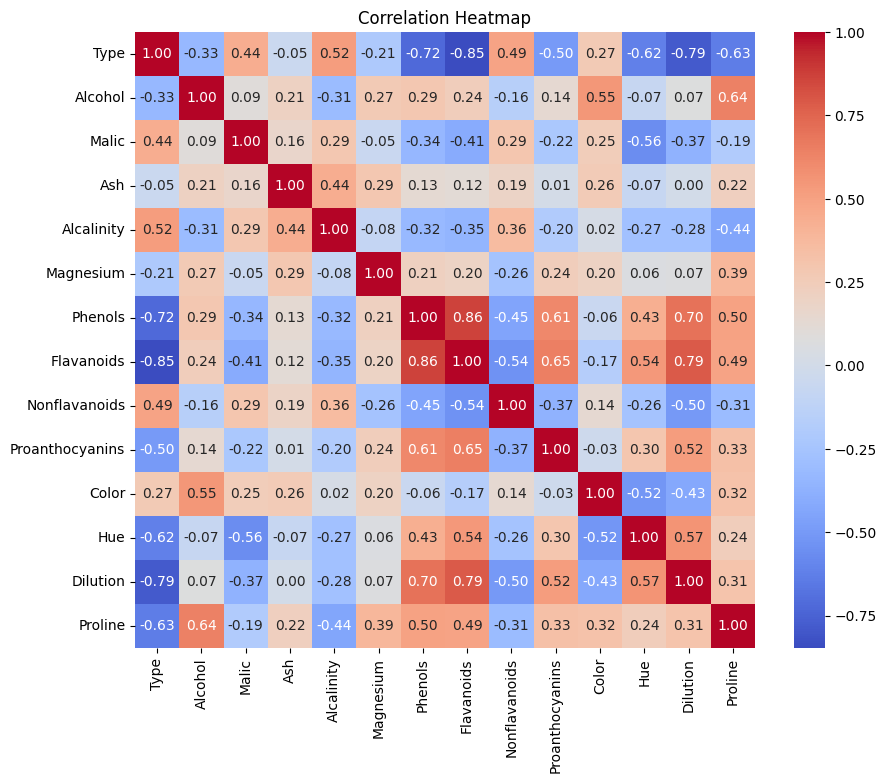

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Task 2: PCA (Dimensionality Reduction)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

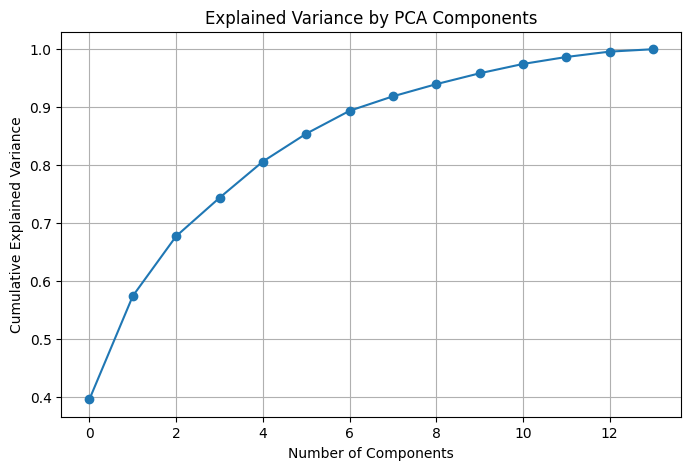

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [13]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {n_components}")

Optimal number of components to retain 95% variance: 10


In [14]:
pca_opt = PCA(n_components=n_components)
X_pca_opt = pca_opt.fit_transform(X_scaled)

## Task 3: Clustering on Original Data

In [15]:
kmeans_orig = KMeans(n_clusters=3, random_state=42)
y_kmeans_orig = kmeans_orig.fit_predict(X_scaled)

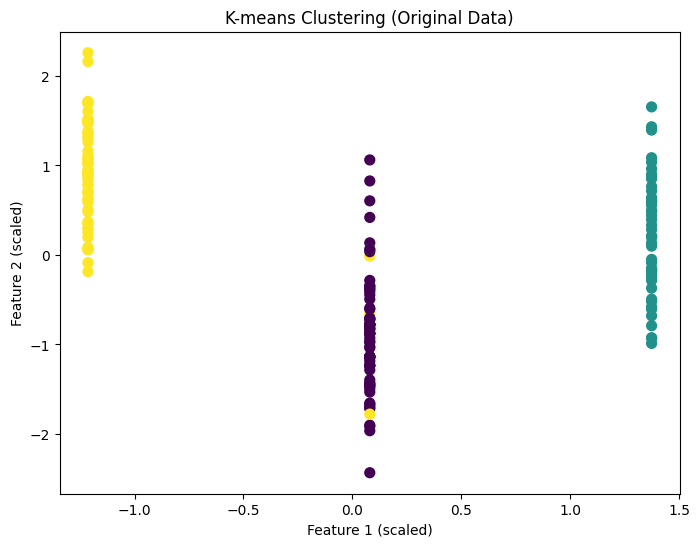

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_orig, cmap='viridis', s=50)
plt.title("K-means Clustering (Original Data)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [17]:
silhouette_orig = silhouette_score(X_scaled, y_kmeans_orig)
dbi_orig = davies_bouldin_score(X_scaled, y_kmeans_orig)
print(f"Silhouette Score (Original Data): {silhouette_orig:.3f}")
print(f"Davies-Bouldin Index (Original Data): {dbi_orig:.3f}")

Silhouette Score (Original Data): 0.306
Davies-Bouldin Index (Original Data): 1.316


## Task 4: Clustering on PCA Data

In [18]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca_opt)

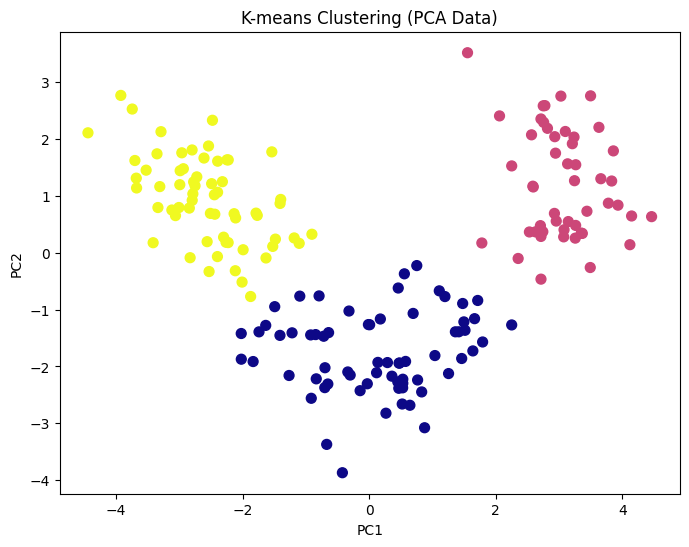

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_opt[:, 0], X_pca_opt[:, 1], c=y_kmeans_pca, cmap='plasma', s=50)
plt.title("K-means Clustering (PCA Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [20]:
silhouette_pca = silhouette_score(X_pca_opt, y_kmeans_pca)
dbi_pca = davies_bouldin_score(X_pca_opt, y_kmeans_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index (PCA Data): {dbi_pca:.3f}")

Silhouette Score (PCA Data): 0.323
Davies-Bouldin Index (PCA Data): 1.258


## Task 5: Comparison & Analysis

In [22]:
print("\n--- Clustering Performance Comparison ---")
print(f"Silhouette (Original): {silhouette_orig:.3f} vs Silhouette (PCA): {silhouette_pca:.3f}")
print(f"DBI (Original): {dbi_orig:.3f} vs DBI (PCA): {dbi_pca:.3f}")

if silhouette_pca > silhouette_orig:
    print("PCA improved clustering performance.")
else:
    print("Original data performed better or equally well.")



--- Clustering Performance Comparison ---
Silhouette (Original): 0.306 vs Silhouette (PCA): 0.323
DBI (Original): 1.316 vs DBI (PCA): 1.258
PCA improved clustering performance.


## Task 6: Conclusion & Insights

## Conclusion & Insights
### 1. PCA reduced dimensionality while retaining most variance.
### 2. Clustering results were compared between original and PCA data.
### 3. Trade-off: PCA simplifies data, improves visualization, but may lose some fine details.
### 4. Recommendation: Use PCA when dataset has high dimensionality or when visualization is needed.